Reference: https://github.com/NisansaDdS/Some-Languages-are-More-Equal-than-Others/blob/main/Generate%20Diagrams.ipynb

In [56]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from math import log10

plt.rcParams.update({'font.size': 25})

In [57]:
fig_save_dir = "outputs"
input_dir = "inputs"

In [99]:
lang_classes = tuple(map(str, range(6)))
resource_types = ("data", "code", "model")
colors = {
    "Used others' artefact as it is": "#2077B5",
    "Based on extended/modified artefact": "#FF800D",
    "Used others' artefact + added their own part": "#ffa600",
    "Introduced new artefact": "#2BA02B",
    "Artefact not needed/considered": "#dd5182",
    "Can't determine": "#444e86",
}

resource_values = {
    "data": {
        "introduce new data": "Introduced new artefact",
        "used others' but introduce their own part": "Used others' artefact + added their own part",
        "extended soneone's data": "Based on extended/modified artefact",
        "used others' data": "Used others' artefact as it is",
        "data not needed": "Artefact not needed/considered",
        "cant determine": "Can't determine",
    },
    "code": {
        "wrote their own code": "Introduced new artefact",
        "build new code and use others' as well": "Used others' artefact + added their own part",
        "based-on/modified someone's code": "Based on extended/modified artefact",
        "used someone's code": "Used others' artefact as it is",
        "did not use code": "Artefact not needed/considered",
        "cant determine": "Can't determine",
    },
    "model": {
        "trained their own model": "Introduced new artefact",
        "used someone's model but trained theirs as well": "Used others' artefact + added their own part",
        "extended someone's model": "Based on extended/modified artefact",
        "used someon'e model": "Used others' artefact as it is",
        "didnt use model": "Artefact not needed/considered",
        "cant determine": "Can't determine",
    }
}

In [104]:
    
def get_df_weight_counts(df, resource_type):
    value_counts = df[f"{resource_type}"].value_counts()
    weight_counts = {}
    for av_type in colors:
        weight_counts[av_type] = value_counts[av_type] if av_type in value_counts else 0
    return weight_counts

def normalize_counts(weight_counts, resource_type):
    for i in range(len(lang_classes)):
        tot = sum([weight_counts[av_type][i] for av_type in colors])
        for av_type in colors:
            weight_counts[av_type][i] /= tot
    return weight_counts

def create_plot(weight_counts, resource_type, conf, width=0.8):
    
    _, ax = plt.subplots()
    bottom = np.zeros(len(lang_classes))

    for label, weight_count in weight_counts.items():
        p = ax.bar(lang_classes, weight_count, width, label=label, bottom=bottom, color=colors[label])
        bottom += weight_count

    # ax.set_title(f"Availability of {resource_type.capitalize()}")
    # ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=3)
    
    plt.ylabel("Fraction of papers")
    plt.xlabel("Language Class")
    
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    
    filename = f"classwise_resource_usage_{conf}-{resource_type}.pdf"
    plt.savefig(os.path.join(fig_save_dir, filename), bbox_inches='tight', dpi=500, format="pdf")
    plt.show()

In [105]:
def get_resource_weight_counts(conf, resource_type):
    weight_counts = {av_type: [] for av_type in colors}
    df = pd.read_csv(os.path.join(input_dir, f"{conf}_resource_info.csv"))
    df = df.replace(resource_values[resource_type])
    
    for i in range(6):
        class_df = df[(df["lang class"] == i)]
        df_wc = get_df_weight_counts(class_df, resource_type)
        # print(1, df_wc)
        for av_type in df_wc:
            weight_counts[av_type].append(df_wc[av_type])
    return weight_counts

data


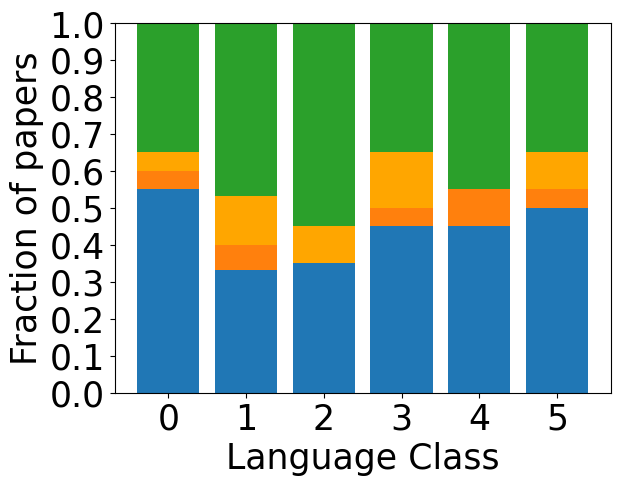

code


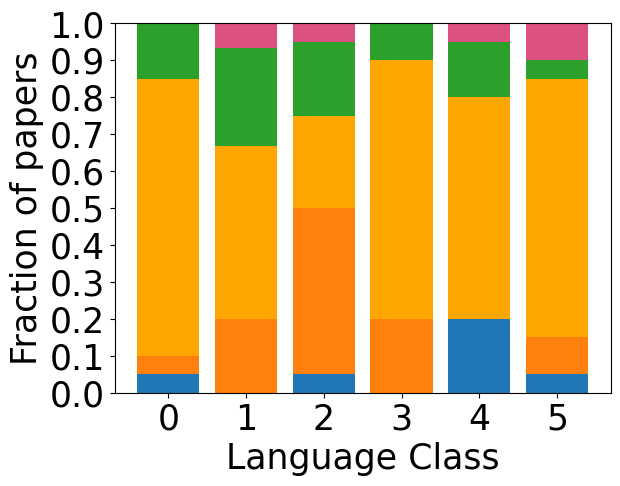

model


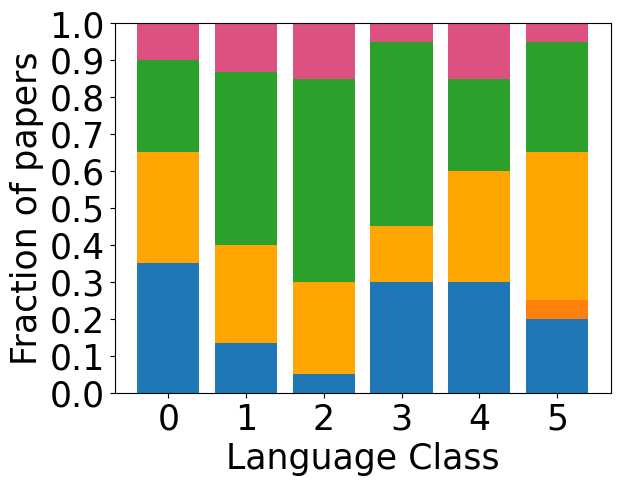

data


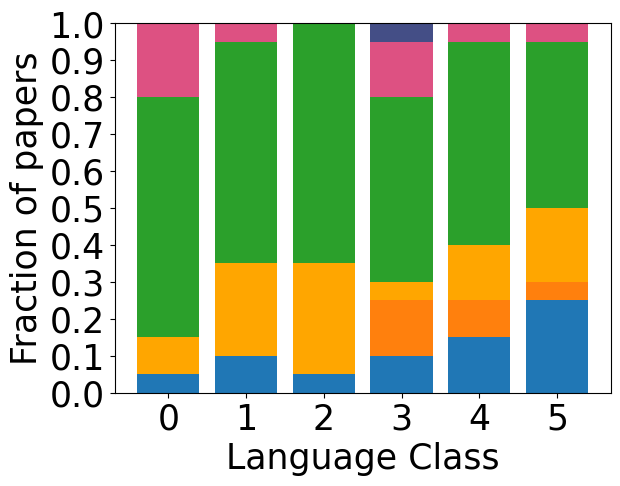

code


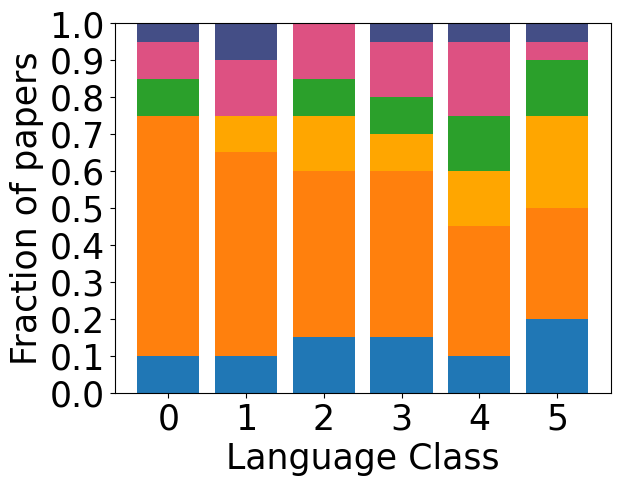

model


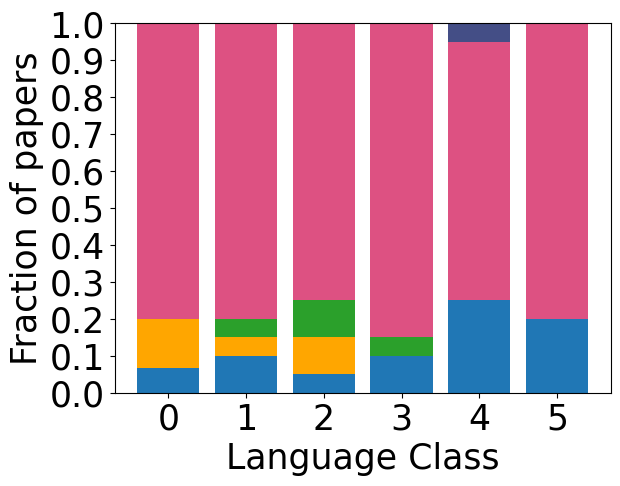

data


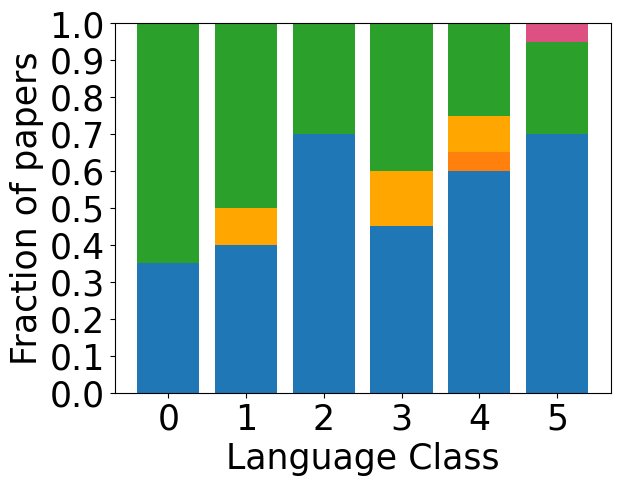

code


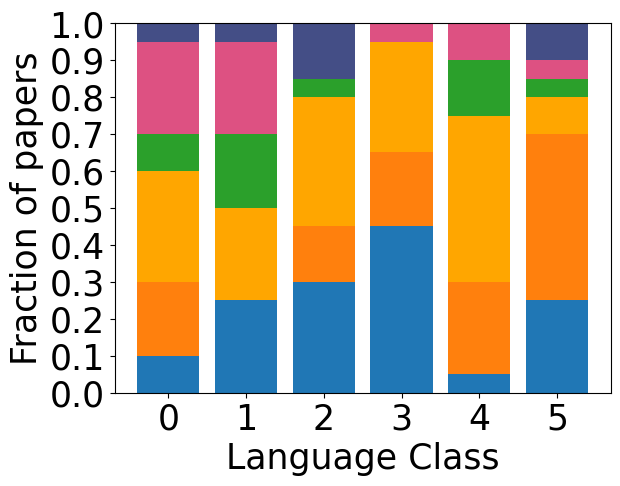

model


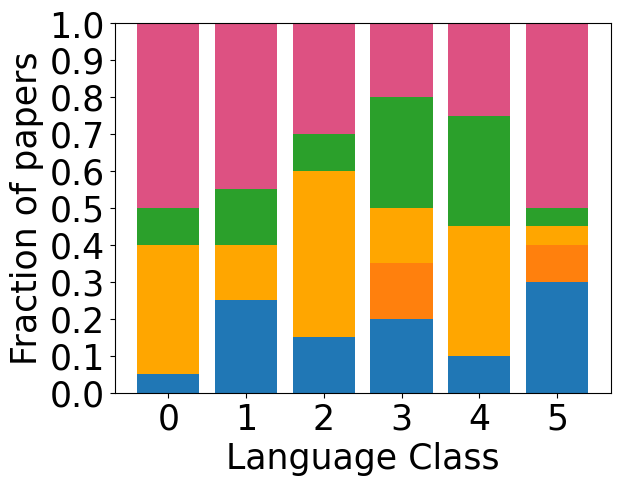

In [106]:
as_fraction = True
for conf in ("Main", "LREC", "Other"):
    for resource_type in resource_values:
        print(resource_type)
        weight_counts = get_resource_weight_counts(conf, resource_type)
        if as_fraction:
            weight_counts = normalize_counts(weight_counts, resource_type)
        create_plot(weight_counts, resource_type, conf)

2428 15384


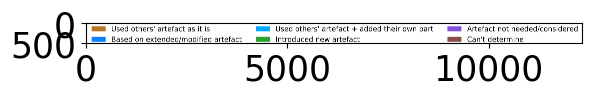

True

In [103]:
# Generate one plot with legend and in png format before the following step
import cv2
axisPath = "outputs/classwise_resource_usage_LREC-data.png"
imgAxis = cv2.imread(axisPath)
h, w, _ = imgAxis.shape
print(str(h)+" "+str(w))
imgAxis=imgAxis[180:690, 3070:, :] # 2x3: 180:690, 3070:, : # 180:910, 3070:, :
plt.imshow(imgAxis)
plt.show()
axisPath = "outputs/classwise_resource_usage_legend_Appendix.png"
cv2.imwrite(axisPath, imgAxis)

# Resource Availability Analysis

In [85]:
n_classes = 6
lang_classes = tuple(map(str, range(n_classes)))
mapping = {
    "y": "Yes",
    "n": "No",
    "cant release": "Can't release",
    # "NOT applicable": "N/A",
}
colors = {
    "Yes": "#2BA02B",
    "No": "#D52828",
    "Can't release": "#368CE7",#FF800D
    # "N/A": "#2077B5",
}
availability_types = tuple(mapping.keys())
resource_types = ("data", "code", "model", "tool")

In [86]:
def preprocess_df(df):
    prev_lang = ""
    del_rows = []
    for row in df.iterrows():
        idx, data = row
        if data.tolist().count("NOT applicable") == 4:
            del_rows.append(idx)
        if pd.isna(data["language"]):
            df.at[idx, "language"] = prev_lang
        else:
            prev_lang = data["language"]
    df.drop(index=del_rows, inplace=True)
    return df
    

def get_df_weight_counts(df, resource_type):
    value_counts = df[f"{resource_type} released?"].value_counts()
    weight_counts = {}
    for av_type in availability_types:
        weight_counts[av_type] = value_counts[av_type] if av_type in value_counts else 0
    return weight_counts

def normalize_counts(weight_counts):
    for i in range(len(lang_classes)):
        tot = sum([weight_counts[cat][i] for cat in availability_types])
        for av_type in availability_types:
            weight_counts[av_type][i] /= tot
    return weight_counts


def map_availability_names(weight_counts):
    for av_type in tuple(weight_counts.keys()):
        weight_counts[mapping[av_type]] = weight_counts.pop(av_type)
    return weight_counts
    

In [87]:
def get_resource_weight_counts(resource_type):
    weight_counts = {av_type: [] for av_type in availability_types}
    for i in range(n_classes):
        df = pd.read_csv(os.path.join(input_dir, f"{i}.csv"))
        df = preprocess_df(df)
        df_wc = get_df_weight_counts(df, resource_type)
        for av_type in df_wc:
            weight_counts[av_type].append(df_wc[av_type])
    return weight_counts

In [94]:
def create_plot(weight_counts, resource_type, width=0.8, as_fraction=True):
    weight_counts = map_availability_names(weight_counts)
    
    _, ax = plt.subplots()
    bottom = np.zeros(len(lang_classes))

    for label, weight_count in weight_counts.items():
        p = ax.bar(lang_classes, weight_count, width, label=label, bottom=bottom, color=colors[label])
        bottom += weight_count

    # ax.set_title(f"Availability of {resource_type.capitalize()}")
    # ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=len(weight_counts))
    
    if as_fraction:
        ylabel = "Fraction of papers"
    else:
        ylabel = "# of papers"
    plt.ylabel(ylabel, fontdict={'size': 30})
    plt.xlabel("Language Class", fontdict={'size': 32})
    
    
    filename = f"classwise_availability_{'fraction' if as_fraction else 'count'}-{resource_type}.pdf"
    plt.savefig(os.path.join(fig_save_dir, filename), bbox_inches='tight', dpi=500, format="pdf")
    plt.show()

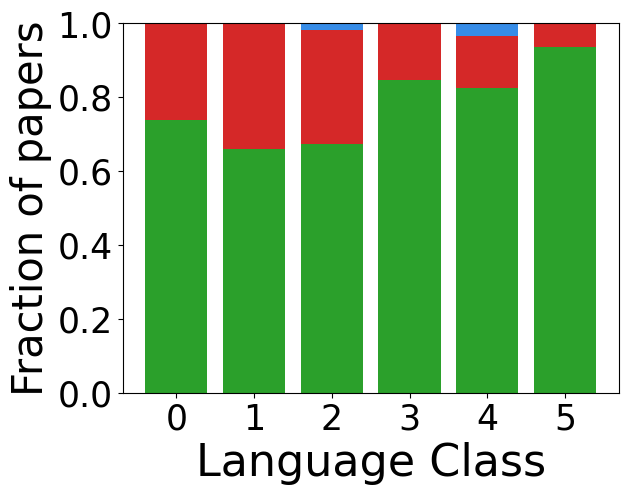

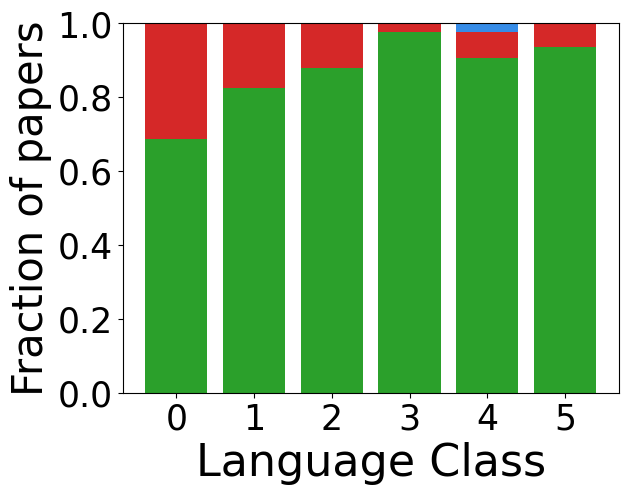

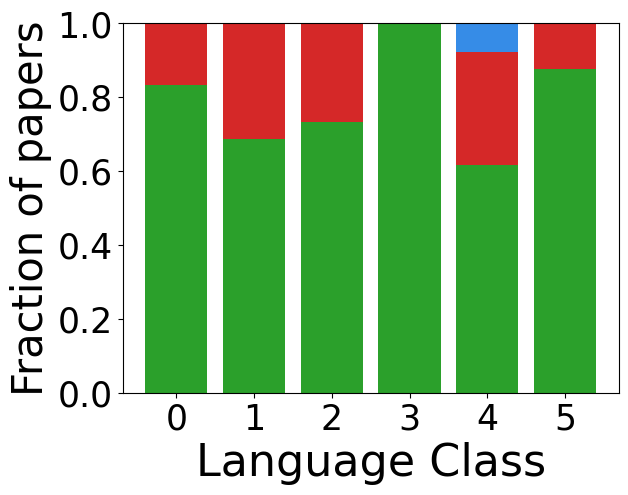

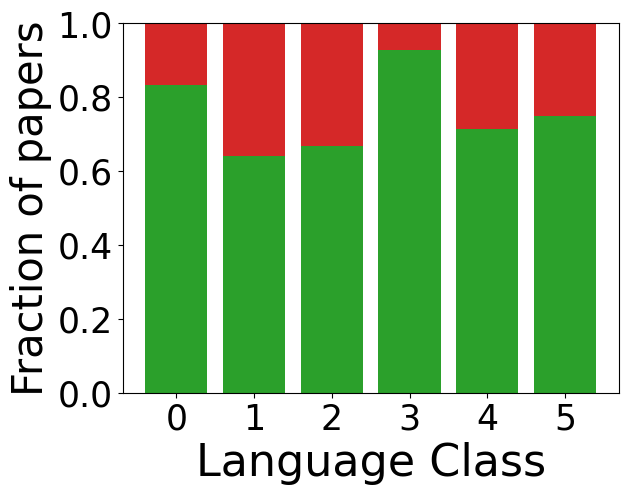

In [95]:
as_fraction = True
for resource_type in resource_types:
    weight_counts = get_resource_weight_counts(resource_type)
    if as_fraction:
        weight_counts = normalize_counts(weight_counts)
    create_plot(weight_counts, resource_type, as_fraction=as_fraction)

2473 7171


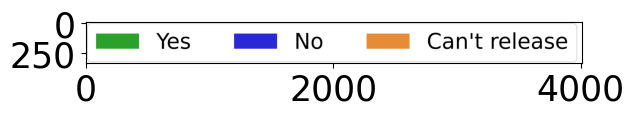

True

In [93]:
# Generate one plot with legend and in png format before the following step
import cv2
axisPath = "outputs/classwise_availability_fraction-data.png"
imgAxis = cv2.imread(axisPath)
h, w, _ = imgAxis.shape
print(str(h)+" "+str(w))
imgAxis=imgAxis[190:520, 3160:, :] # Crop out the graph
plt.imshow(imgAxis)
plt.show()
axisPath = "outputs/classwise_availability_legend.png"
cv2.imwrite(axisPath, imgAxis)

# HF Data and Model Count Analysis

In [23]:
lang_classes = tuple(range(6))

In [24]:
hf_counts_df = pd.read_csv(os.path.join(input_dir, "hf_counts.tsv"), delimiter="\t")
hf_counts_df["Datasets"] = hf_counts_df["Datasets"].astype(int)
hf_counts_df["Models"] = hf_counts_df["Models"].astype(int)

In [25]:
hf_counts_df[["Datasets", "Models"]].corr()

,Datasets,Models
Datasets,1.000000,0.997248
Models,0.997248,1.000000


In [26]:
hf_counts_df

,Language,ISO code,Datasets,Models
0,English English,en,7596,34392
1,Chinese 中文,zh,901,3433
2,French Français,fr,812,3144
3,Spanish Español,es,635,2440
4,Russian Русский,ru,601,1712
...,...,...,...,...
2038,Simte,smt,1,15
2039,Peruvian Sign Language,prl,1,3
2040,Colombian Sign Language,csn,1,4
2041,Argentine Sign Language,aed,1,4


In [27]:
hf_counts = {}
seen_indices = {}
data_counts = []
model_counts = []
log_data_counts = []
log_model_counts = []
lang_list = []
use_log = True
for i in lang_classes:
    hf_counts[i] = []
    data_counts.append([])
    model_counts.append([])
    log_data_counts.append([])
    log_model_counts.append([])
    lang_list.append([])
    with open(f"LangClasses/{i}.txt", "r", encoding="utf-8") as fp:
        langs = fp.read().lower().strip().split("\n")
    for lang in langs:
        lang_data_count, lang_model_count = 0, 0
        for j, lang_ in enumerate(hf_counts_df["Language"]):
            if lang in lang_.lower().split(" ") or (lang.count(" ") > 0 and lang in lang_.lower()):
                if j in seen_indices:
                    print(j, lang_, "-", lang, "-", seen_indices[j])
                    continue
                seen_indices[j] = lang
                row = hf_counts_df.iloc[j]
                lang_data_count += row["Datasets"]
                lang_model_count += row["Models"]
        hf_counts[i].append((lang, lang_data_count, lang_model_count))
        data_counts[int(i)].append(lang_data_count)
        model_counts[int(i)].append(lang_model_count)
        log_data_counts[int(i)].append(log10(lang_data_count) if lang_data_count != 0 else 0)
        log_model_counts[int(i)].append(log10(lang_model_count) if lang_model_count != 0 else 0)
        lang_list[int(i)].append(lang)
        

1682 Angal Heneng - angal heneng - angal
1826 Batak Angkola - batak angkola - batak
1594 Batak Dairi - batak dairi - batak
813 Batak Karo - batak karo - batak
1387 Batak Simalungun - batak simalungun - batak
433 Batak Toba - batak toba - batak
1482 Casiguran Dumagat Agta - dumagat - agta
773 Ese Ejja - ese ejja - ese
1487 Hanga Hundi - hanga hundi - hanga
485 Kadazan Dusun - kadazan dusun - kadazan
1518 Kala Lagaw Ya - kala lagaw ya - kala
557 Amri Karbi - karbi - amri karbi
813 Batak Karo - karo - batak
1912 Lahu Shi - lahu shi - lahu
1305 Ata Manobo - manobo - ata
1811 Maring Naga - naga - maring
1832 Samba Leko - samba leko - samba
1912 Lahu Shi - shi - lahu
1899 Toro So Dogon - so - dogon
433 Batak Toba - toba - batak
1899 Toro So Dogon - toro - dogon
357 Northern Luri - northern luri - luri
312 Tetun Dili - tetun - tetun dili
84 Javanese basa Jawa - javanese - basa
534 Huamalíes-Dos de Mayo Huánuco Quechua - quechua - mayo
112 Sundanese Basa Sunda - sunda - basa
462 Western Armeni

In [28]:
stats = {
    "data": {
        "Count": data_counts,
        "Log Count": log_data_counts
    },
    "model": {
        "Count": model_counts,
        "Log Count": log_model_counts
    }
}

In [29]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)
        
        print(dict1['median'])

    return pd.DataFrame(rows_list)

In [32]:
def plot_boxplot(data, filename, ylabel="Count"):
    fig = plt.figure(figsize=(4, 3), dpi=100)
    
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    
    # Creating plot
    bp = ax.boxplot(data)
    
    plt.ylabel(ylabel)
    plt.xlabel("Language Class")
    plt.xticks(ticks=range(1, 7), labels=list(map(str, range(6))))
    
    plt.savefig(os.path.join(fig_save_dir, filename), bbox_inches='tight', dpi=500, format="pdf")
    
    # show plot
    plt.show()
    
    return get_box_plot_data(list(range(6)), bp)

# plot_boxplot(model_counts, "classwise_hf_counts-models.png")

data


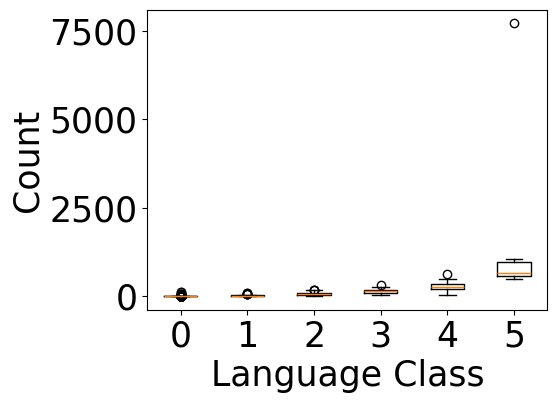

0.0
12.0
53.0
147.5
246.0
657.0


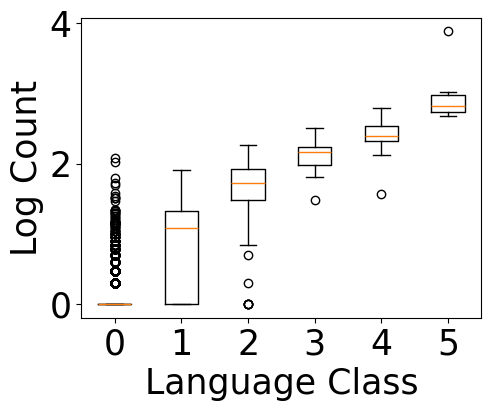

0.0
1.0791812460476249
1.7241985517288838
2.1684898876003276
2.3909028103470242
2.8175653695597807
model


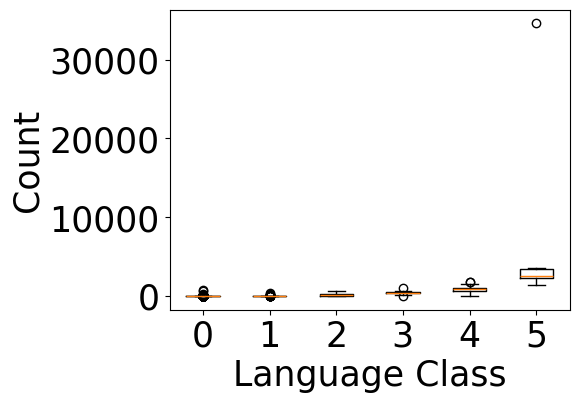

0.0
3.0
171.5
443.5
881.0
2601.0


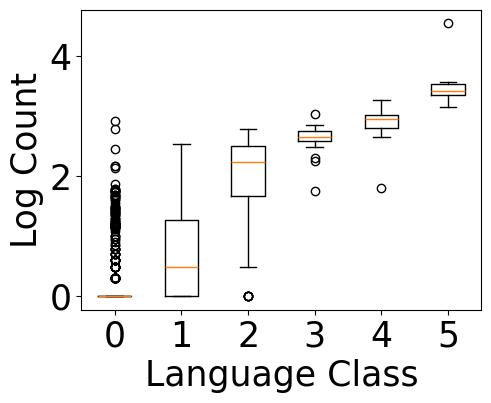

0.0
0.47712125471966244
2.233730054753632
2.6468933481688444
2.9449580023378914
3.4151403521958725


In [33]:
for resource_type in stats:
    print(resource_type)
    for value_type in stats[resource_type]:
        plot_boxplot(stats[resource_type][value_type], f"boxplot_{resource_type}_{value_type}.pdf", value_type)

In [34]:
def get_q1_q3_med_outliers(arr):
    # finding the 1st quartile
    q1 = np.quantile(arr, 0.25)
    
    # finding the 3rd quartile
    q3 = np.quantile(arr, 0.75)
    med = np.median(arr)
    
    # finding the iqr region
    iqr = q3 - q1
    
    # finding upper and lower whiskers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    upper_outliers = np.array(arr) > upper_bound
    lower_outliers = np.array(arr) < lower_bound
    normal_points = np.logical_not(np.logical_or(upper_outliers, lower_outliers))
    return q1, q3, med, upper_outliers, lower_outliers, normal_points

In [35]:
def get_stats(counts, print_out=False):
    txt = ""
    stats = {}
    for i, arr in enumerate(counts):
        langs = np.array(lang_list[i])
        txt += f"Class {i}\n"
        q1, q3, med, upper_outliers, lower_outliers, normal_points = get_q1_q3_med_outliers(arr)
        stats[i] = {}
        stats[i]["Q1"] = q1
        stats[i]["Q3"] = q3
        stats[i]["Median"] = med
        txt += f"\tQ1: {q1}\n"
        txt += f"\tQ3: {q3}\n"
        txt += f"\tMedian: {med}\n"
        
        normal_lang_points = list(zip(langs[normal_points], np.array(arr)[normal_points]))
        upper_lang_outliers = list(zip(langs[upper_outliers], np.array(arr)[upper_outliers]))
        lower_lang_outliers = list(zip(langs[lower_outliers], np.array(arr)[lower_outliers]))
        normal_lang_points = sorted(normal_lang_points, key=lambda x: x[1])
        upper_lang_outliers = sorted(upper_lang_outliers, key=lambda x: -x[1])
        lower_lang_outliers = sorted(lower_lang_outliers, key=lambda x: x[1])
        
        # stats[i]["Normal"] = {lang: int(count) for lang, count in normal_lang_points}
        stats[i]["Upper Outliers"] = {lang: float(count) for lang, count in upper_lang_outliers}
        stats[i]["Lower Outliers"] = {lang: float(count) for lang, count in lower_lang_outliers}
        
        txt += f"\tNormal: {normal_lang_points}\n"
        txt += f"\tUpper Outliers: {upper_lang_outliers}\n"
        txt += f"\tLower Outliers: {lower_lang_outliers}\n\n"
    if print_out:
        print(txt)
    
    return stats

In [38]:
for resource_type in stats:
    for value_type in stats[resource_type]:
        with open(f"{fig_save_dir}/hfstats_{resource_type}_{value_type}.json", "w", encoding="utf-8") as fp:
            statistics = get_stats(stats[resource_type][value_type])
            json.dump(statistics, fp)

# Conference Sample Cumulative Graphs

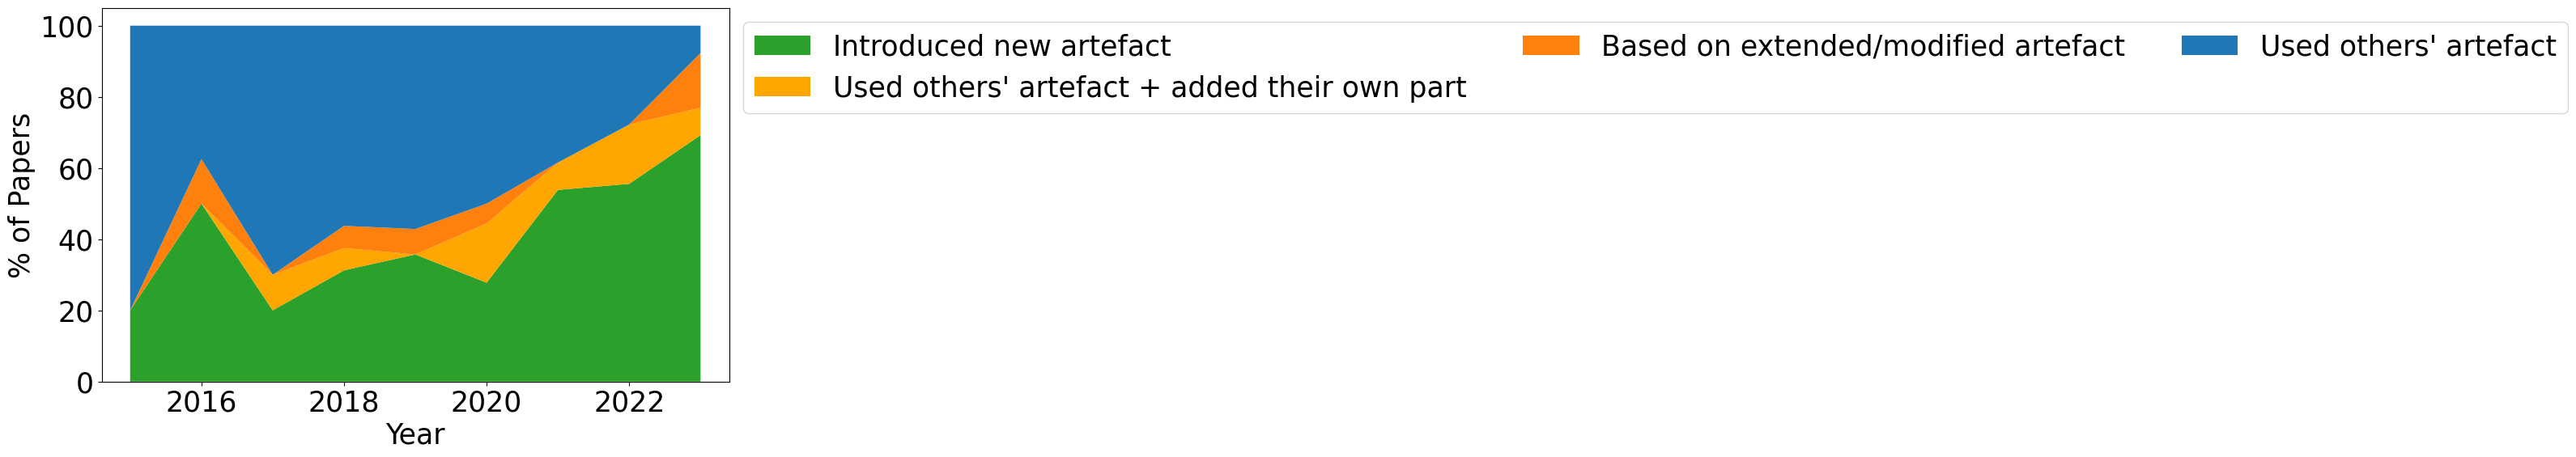

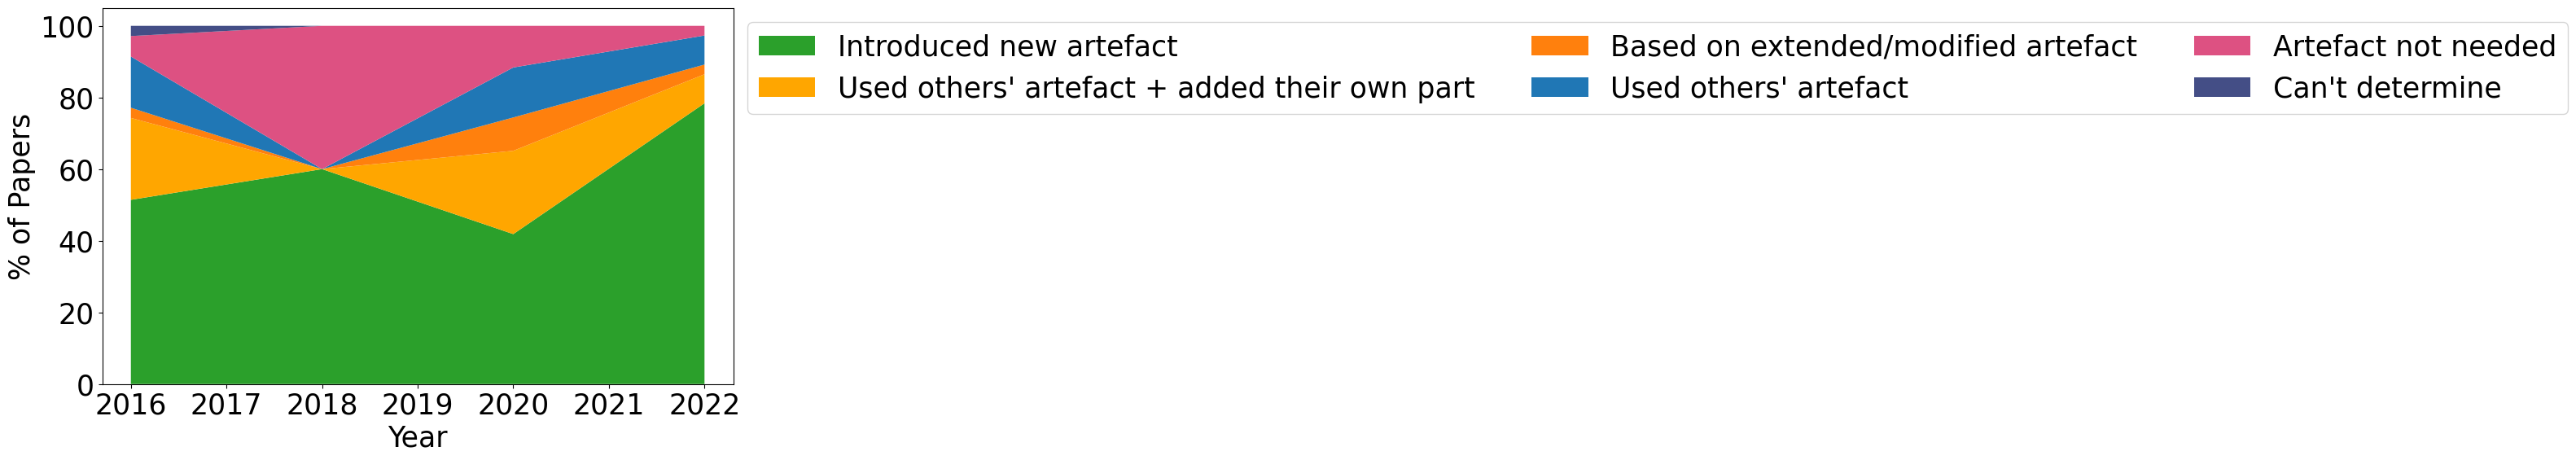

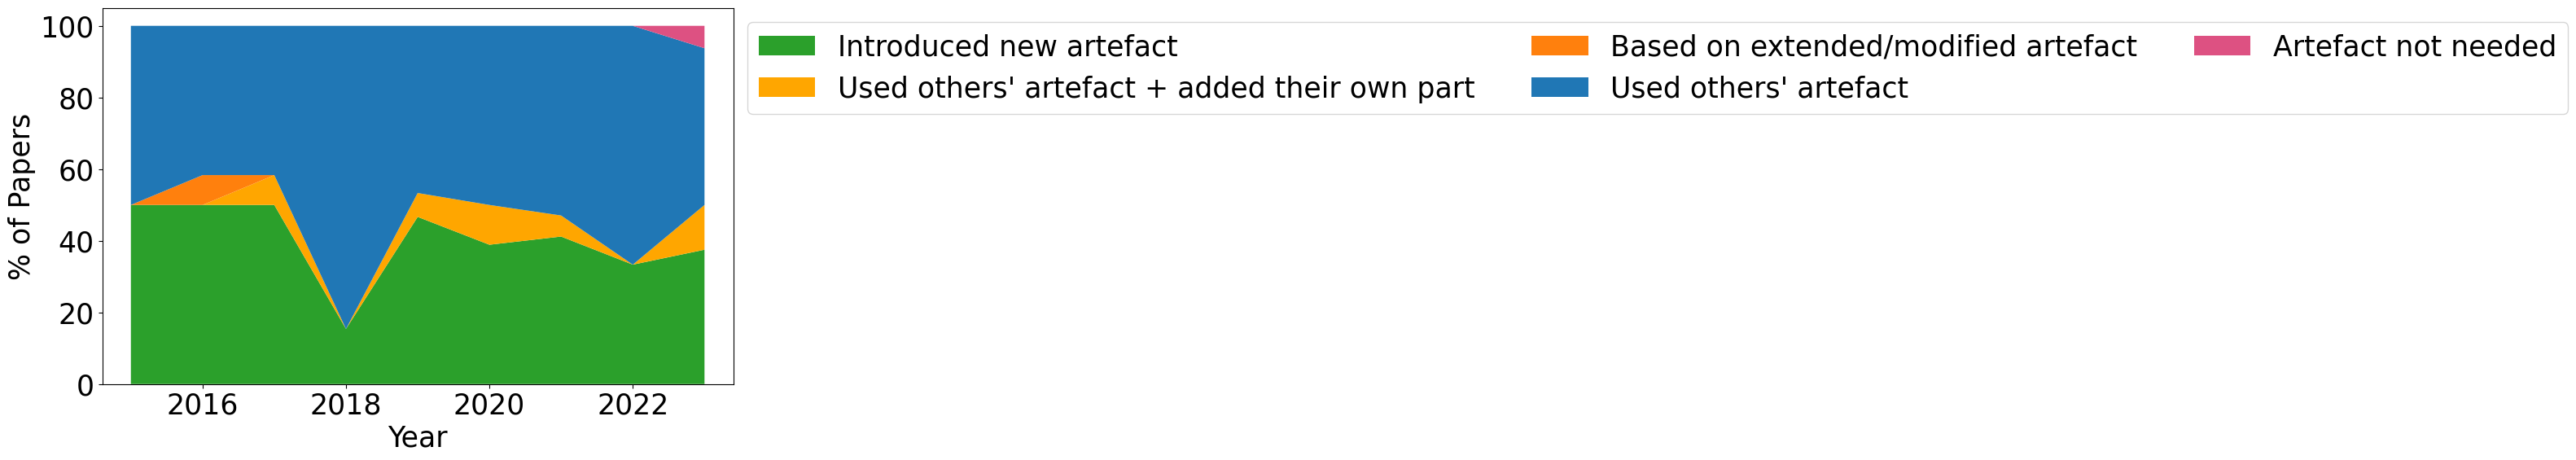

In [40]:
colors = {
    "Yes": "#2BA02B",
    "No": "#D52828",
    "Can't release": "#FF800D",
    "N/A": "#2077B5",
}
resource_values = {
    # "data": {
    #     "introduce new data": ("introduced new data", "#2BA02B"),
    #     "extended soneone's data": ("extended someone's data", "#2077B5"),
    #     "used others' data": ("used others' data", "#FF800D"),
    #     "used others' but introduce their own part": ("used others' but introduced own part", "#ffa600"),
    #     "data not needed": ("data not needed", "#dd5182"),
    #     "cant determine": ("can't determine", "#444e86")
    # },
    "data": {
        "introduce new data": ("Introduced new artefact", "#2BA02B"),
        "used others' but introduce their own part": ("Used others' artefact + added their own part", "#ffa600"),
        "extended soneone's data": ("Based on extended/modified artefact", "#FF800D"),
        "used others' data": ("Used others' artefact", "#2077B5"),
        "data not needed": ("Artefact not needed", "#dd5182"),
        "cant determine": ("Can't determine", "#444e86")
    },
    "code": {
        "wrote their own code": ("wrote their own code", "#2BA02B"),
        "build new code and use others' as well": ("built new code and used others'", "#ffa600"),
        "based-on/modified someone's code": ("based-on/modified someone's code", "#FF800D"),
        "used someone's code": ("used someone's code", "#2077B5"),
        "did not use code": ("did not use code", "#dd5182"),
        "cant determine": ("can't determine", "#444e86"),
    },
    "model": {
        "trained their own model": ("trained their own model", "#2BA02B"),
        "used someone's model but trained theirs as well": ("used someone's and trained own", "#ffa600"),
        "extended someone's model": ("extended someone's model", "#FF800D"),
        "used someon'e model": ("used someone's model", "#2077B5"),
        "didnt use model": ("didn't use a model", "#dd5182"),
        "cant determine": ("can't determine", "#444e86"),
    }
}

def plot_cumulative_chart(df, resource_type, filename):
    grouped_df = df[["year", resource_type]].groupby(['year', resource_type]).size().unstack(fill_value=0)
    grouped_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100
    
    resource_values_cp = resource_values[resource_type].copy()
    for data in resource_values[resource_type]:
        if data not in grouped_df:
            del resource_values_cp[data]

    years = grouped_df.index
    data_values = [val[0] for val in resource_values_cp.values()]
    data_colors = [val[1] for val in resource_values_cp.values()]
    
    percentages = [grouped_df[data] for data in resource_values_cp]
    fig, ax = plt.subplots(figsize=(10, 6))
    stacks = plt.stackplot(years, *percentages, labels=data_values, colors=data_colors)

    plt.xlabel('Year')
    plt.ylabel('% of Papers')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncols=3)
    
    plt.savefig(os.path.join(fig_save_dir, filename), bbox_inches='tight', dpi=500, format="pdf")

    # Show the plot
    plt.show()

for conf in ("Main", "LREC", "Other"):
    df = pd.read_csv(os.path.join(input_dir, f"{conf}_resource_info.csv"))
    for resource_type in ("data",):
        plot_cumulative_chart(df, resource_type, f"cumu_{conf}-{resource_type}.pdf")

2784 14404


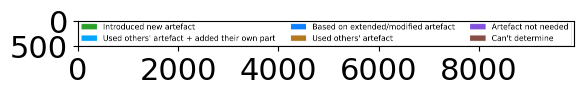

True

In [379]:
import cv2
axisPath = "outputs/cumu_LREC-data.png"
imgAxis = cv2.imread(axisPath)
h, w, _ = imgAxis.shape
print(str(h)+" "+str(w))
imgAxis=imgAxis[120:630, 4510:16000, :] #100:1540, 4500:7920, :
plt.imshow(imgAxis)
plt.show()
axisPath = "outputs/cumu_legend.png"
cv2.imwrite(axisPath, imgAxis)

# Generate Sankey graph code

In [41]:
all_resource_types = ("data", "code", "model")

In [42]:
def promised(df, resource_types):
    code_txt = ""
    for resource_type in all_resource_types:
        if resource_type in resource_types:
            condition = '== "yes"'
        else:
            condition = '!= "yes"'
        code_txt += f'(df["promise to release {resource_type}?"] {condition}) &'
    code_txt = code_txt[:-2]
    return eval(f"df[{code_txt}].shape[0]")


def promised_and_delivered(df, resource_types):
    code_txt = ""
    for resource_type in all_resource_types:
        if resource_type in resource_types:
            condition = '== "yes"'
        else:
            condition = '!= "yes"'
        code_txt += f'(df["promise to release {resource_type}?"] {condition}) & (df["{resource_type} link given?"] {condition}) &'
    code_txt = code_txt[:-2]
    return eval(f"df[{code_txt}].shape[0]")


def simplify_node_name(node):
    mapping = {
        "data, code, and model": "dcm",
        "data and code only": "dc",
        "data and model only": "dm",
        "code and model only": "cm",
        "data only": "d",
        "code only": "c",
        "model only": "m",
    }
    for key in mapping:
        node = node.replace(key, mapping[key]).replace(" not", "n").replace( "r", "r")
    return node


def generate_sankey_code(conf, agg_data):
    txt = ""
    color_txt = ""
    for key in agg_data:
        if key.startswith("promised to"):
            if agg_data[key] > 0:
                node = key.split("release ")[1]
                txt += f"{conf}[{agg_data[key]}] {node}\n"
        elif key == "promised nothing":
            if agg_data[key] > 0:
                node = "n"
                txt += f"{conf}[{agg_data[key]}] {node}\n"
                color_txt += f":{key} #800080\n"
        if key.startswith("promised and delivered"):
            resource = key.split("delivered ")[1]
            start_node = "promised to release " + resource
            if agg_data[key] > 0:
                node = simplify_node_name(f"{resource}r")
                txt += f"{resource}[{agg_data[key]}] {node}\n"
                color_txt += f":{node} #2BA02B\n"
            not_released = agg_data[start_node] - agg_data[key]
            if not_released > 0:
                node = simplify_node_name(f"{resource}nr")
                txt += f"{resource}[{not_released}] {node}\n"  
                color_txt += f":{node} #D52828\n"
    txt += "\n" + color_txt
    txt = txt.replace("data", "Data").replace("code", "Code").replace("model", "Model")
    return txt

In [43]:
for conf in ("LREC", "Main", "Other"):
    print(conf)
    df = pd.read_csv(os.path.join(input_dir, f"{conf}_sample_promise_info.csv"))
    agg_data = {}
    agg_data["promised to release data only"] = promised(df, ["data"])
    agg_data["promised to release code only"] = promised(df, ["code"])
    agg_data["promised to release model only"] = promised(df, ["model"])
    agg_data["promised to release data and code only"] = promised(df, ["data", "code"])
    agg_data["promised to release code and model only"] = promised(df, ["code", "model"])
    agg_data["promised to release data and model only"] = promised(df, ["data", "model"])
    agg_data["promised to release data, code, and model"] = promised(df, ["data", "code", "model"])
    agg_data["promised nothing"] = promised(df, [])

    agg_data["promised and delivered data only"] = promised_and_delivered(df, ["data"])
    agg_data["promised and delivered code only"] = promised_and_delivered(df, ["code"])
    agg_data["promised and delivered model only"] = promised_and_delivered(df, ["model"])
    agg_data["promised and delivered data and code only"] = promised_and_delivered(df, ["data", "code"])
    agg_data["promised and delivered code and model only"] = promised_and_delivered(df, ["code", "model"])
    agg_data["promised and delivered data and model only"] = promised_and_delivered(df, ["data", "model"])
    agg_data["promised and delivered data, code, and model"] = promised(df, ["data", "code", "model"])
    print(agg_data["promised to release data and model only"], agg_data["promised and delivered data and model only"])
    
    print(generate_sankey_code(conf, agg_data))

LREC
0 0
LREC[39] Data only
LREC[10] Code only
LREC[20] Data and Code only
LREC[3] Data, Code, and Model
LREC[36] n
Data only[25] dr
Data only[14] dnr
Code only[8] cr
Code only[2] cnr
Data and Code only[16] dcr
Data and Code only[4] dcnr
Data, Code, and Model[3] dcmr

:promised nothing #800080
:dr #2BA02B
:dnr #D52828
:cr #2BA02B
:cnr #D52828
:dcr #2BA02B
:dcnr #D52828
:dcmr #2BA02B

Main
0 0
Main[17] Data only
Main[16] Code only
Main[1] Model only
Main[17] Data and Code only
Main[12] Data, Code, and Model
Main[50] n
Data only[15] dr
Data only[2] dnr
Code only[13] cr
Code only[3] cnr
Model only[1] mr
Data and Code only[16] dcr
Data and Code only[1] dcnr
Data, Code, and Model[12] dcmr

:promised nothing #800080
:dr #2BA02B
:dnr #D52828
:cr #2BA02B
:cnr #D52828
:mr #2BA02B
:dcr #2BA02B
:dcnr #D52828
:dcmr #2BA02B

Other
1 0
Other[13] Data only
Other[9] Code only
Other[3] Model only
Other[3] Data and Code only
Other[2] Code and Model only
Other[1] Data and Model only
Other[4] Data, Code, 

In [44]:
def update_svg(path, out_path):
    with open(path, "r") as fp:
        svg_text = fp.read()
    
    svg_text =svg_text.replace(' <tspan font-weight="400" font-size="23.8px">n</tspan>', "")
    for key in ("dcm", "cm", "dm", "dc", "d", "c", "m"):
        svg_text = svg_text.replace(f' <tspan font-weight="400" font-size="23.8px">{key}r</tspan>', "").replace(f' <tspan font-weight="400" font-size="23.8px">{key}nr</tspan>', "")
    
    svg_text = svg_text.replace('fill-opacity="0.75"', 'fill-opacity="0.50"')
    
    sankey_labels_txt = '<g id="sankey_labels" font-family="sans-serif" font-size="28px" fill="#000000">'
    svg_text = svg_text.replace(sankey_labels_txt, sankey_labels_txt + '\n<text id="label" class="for_r1" text-anchor="middle" x="462.51335" y="30" font-weight="400" font-size="30px" dy="-5.42">Promised to release</text>')
    
    with open(out_path, "w") as fp:
        fp.write(svg_text)    

In [49]:
for conf in ("LREC", "Main", "Other"):
    update_svg(os.path.join(input_dir, f"sankey_{conf}.svg"), os.path.join(fig_save_dir, f"sankey_{conf}1.svg"))